In [17]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Set backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure backend is set when only plt is referenced

import seaborn as sns

# Ensure inline plotting for notebooks
%matplotlib inline

# Set Seaborn style
sns.set(style='whitegrid')

In [18]:

# We have three data files from different years. Since the files' only columns are 'version' and a URL column, we can augment the data with the year inferred from the filename.

def load_and_augment(filename, year):
    """
    Loads a CSV file, assigns a 'year' column, and returns the DataFrame.
    The CSV file uses space (' ') as the delimiter and ascii encoding.
    """
    try:
        df = pd.read_csv(filename, delimiter=' ', encoding='ascii')
        df['year'] = year
        return df
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return pd.DataFrame()

# Load each dataset
df_2022 = load_and_augment('/kaggle/input/brazilian-crime-reports/data_2022.csv', '2022')
df_2023 = load_and_augment('/kaggle/input/brazilian-crime-reports/data_2023.csv', '2023')
df_2024 = load_and_augment('/kaggle/input/brazilian-crime-reports/data_2024.csv', '2024')

# Combine the data files
df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Quick check on data
print('Combined DataFrame shape:', df.shape)
print('Columns in the DataFrame:', df.columns.tolist())

Error loading /kaggle/input/brazilian-crime-reports/data_2022.csv: [Errno 2] No such file or directory: '/kaggle/input/brazilian-crime-reports/data_2022.csv'
Error loading /kaggle/input/brazilian-crime-reports/data_2023.csv: [Errno 2] No such file or directory: '/kaggle/input/brazilian-crime-reports/data_2023.csv'
Error loading /kaggle/input/brazilian-crime-reports/data_2024.csv: [Errno 2] No such file or directory: '/kaggle/input/brazilian-crime-reports/data_2024.csv'
Combined DataFrame shape: (0, 0)
Columns in the DataFrame: []


In [19]:
# Data Cleaning and Preprocessing

## Check for missing values in key columns and perform necessary cleaning steps

# Check if the key columns 'version' and 'year' exist and have missing values
if 'version' in df.columns:
    print('Missing values in version:', df['version'].isnull().sum())
    # Fill missing 'version' values with an empty string if needed
    df['version'] = df['version'].fillna("")
else:
    print("Column 'version' does not exist in the DataFrame.")

if 'year' in df.columns:
    print('Missing values in year:', df['year'].isnull().sum())
    # Convert 'year' to categorical type as it represents a discrete variable
    df['year'] = df['year'].astype('category')
else:
    print("Column 'year' does not exist in the DataFrame.")

## Attempt to generate descriptive statistics for numeric columns

# Since our data originally did not include clear numeric columns (aside from possible version numbers if they could be parsed), we extract numeric types
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] < 1:
    print("No numeric columns found. Skipping descriptive statistics for numeric data.")
else:
    print(numeric_df.describe())

# Note: The previous error encountered was due to attempting to describe an empty DataFrame (i.e. one with no numeric columns).
# The above check prevents this error by ensuring that the describe() method is only called when numeric columns exist.

Column 'version' does not exist in the DataFrame.
Column 'year' does not exist in the DataFrame.
No numeric columns found. Skipping descriptive statistics for numeric data.


In [20]:
# Exploratory Data Analysis

# Let's take a look at our categorical columns. Given the limited number of columns, we can use count plots to visualize the frequency distributions.

if 'year' in df.columns and not df['year'].empty:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(x='year', data=df, palette='viridis', ax=ax)
    ax.set_title('Count of Records by Year')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot 'year' as the column is missing or empty.")

# Visualizing the 'version' column distribution using a countplot.
if 'version' in df.columns and not df['version'].empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.countplot(x='version', data=df, palette='magma', ax=ax)
    ax.set_title('Count of Records by Version')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot 'version' as the column is missing or empty.")

# If we had any numeric columns and sufficient in number, we could perform additional visualizations such as:
# - Heatmap of correlation (if >=4 numeric columns)
# - Pair Plot (sns.pairplot)
# - Histograms (sns.histplot), and more.

# For now, let's display some general information about our DataFrame
print(df.info())

Cannot plot 'year' as the column is missing or empty.
Cannot plot 'version' as the column is missing or empty.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
None


# Task
To resolve the data loading error, create dummy CSV files named "data_2022.csv", "data_2023.csv", and "data_2024.csv" in the current working directory, each containing a 'version' column and a 'url_column'. Then, modify the data loading cell (`W8JdwZp2Fkmw`) to use these local file paths and re-run cells `W8JdwZp2Fkmw`, `R5Qy6aeaFtph`, and `hPT0JyJVGC-s` to successfully load the data into the `df` DataFrame and perform initial cleaning and exploratory data analysis.

## Resolve Data Loading Error

### Subtask:
Create dummy CSV files named "data_2022.csv", "data_2023.csv", and "data_2024.csv" in the current working directory, each containing a 'version' column and a 'url_column'. Then, modify the data loading cell (`W8JdwZp2Fkmw`) to use these local file paths.


**Reasoning**:
To resolve the FileNotFoundError, I will create dummy CSV files named 'data_2022.csv', 'data_2023.csv', and 'data_2024.csv' with 'version' and 'url_column' columns in the current working directory. This will allow the subsequent data loading step to execute without error.



In [21]:
import pandas as pd

# Create dummy data for 2022
dummy_data_2022 = {
    'version': ['v1.0', 'v1.1', 'v1.0'],
    'url_column': ['http://example.com/2022_a', 'http://example.com/2022_b', 'http://example.com/2022_c']
}
df_dummy_2022 = pd.DataFrame(dummy_data_2022)
df_dummy_2022.to_csv('data_2022.csv', sep=' ', index=False, encoding='ascii')
print("Created data_2022.csv")

# Create dummy data for 2023
dummy_data_2023 = {
    'version': ['v1.1', 'v1.2', 'v1.1'],
    'url_column': ['http://example.com/2023_a', 'http://example.com/2023_b', 'http://example.com/2023_c']
}
df_dummy_2023 = pd.DataFrame(dummy_data_2023)
df_dummy_2023.to_csv('data_2023.csv', sep=' ', index=False, encoding='ascii')
print("Created data_2023.csv")

# Create dummy data for 2024
dummy_data_2024 = {
    'version': ['v1.2', 'v1.3', 'v1.2'],
    'url_column': ['http://example.com/2024_a', 'http://example.com/2024_b', 'http://example.com/2024_c']
}
df_dummy_2024 = pd.DataFrame(dummy_data_2024)
df_dummy_2024.to_csv('data_2024.csv', sep=' ', index=False, encoding='ascii')
print("Created data_2024.csv")

Created data_2022.csv
Created data_2023.csv
Created data_2024.csv


**Reasoning**:
The dummy CSV files have been created. Now, I need to modify the data loading cell (`W8JdwZp2Fkmw`) to use these newly created local file paths instead of the non-existent Kaggle paths. This will resolve the FileNotFoundError and allow the data to be loaded correctly.



In [22]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Set backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure backend is set when only plt is referenced

import seaborn as sns

# Ensure inline plotting for notebooks
%matplotlib inline

# Set Seaborn style
sns.set(style='whitegrid')

# We have three data files from different years. Since the files' only columns are 'version' and a URL column, we can augment the data with the year inferred from the filename.

def load_and_augment(filename, year):
    """
    Loads a CSV file, assigns a 'year' column, and returns the DataFrame.
    The CSV file uses space (' ') as the delimiter and ascii encoding.
    """
    try:
        df = pd.read_csv(filename, delimiter=' ', encoding='ascii')
        df['year'] = year
        return df
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return pd.DataFrame()

# Load each dataset
df_2022 = load_and_augment('./data_2022.csv', '2022')
df_2023 = load_and_augment('./data_2023.csv', '2023')
df_2024 = load_and_augment('./data_2024.csv', '2024')

# Combine the data files
df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Quick check on data
print('Combined DataFrame shape:', df.shape)
print('Columns in the DataFrame:', df.columns.tolist())

Combined DataFrame shape: (9, 3)
Columns in the DataFrame: ['version', 'url_column', 'year']


## Re-run Data Loading and Initial Processing

### Subtask:
Re-execute the data cleaning cell (`R5Qy6aeaFtph`) and the exploratory data analysis cell (`hPT0JyJVGC-s`) to correctly perform initial cleaning and generate visualizations.


**Reasoning**:
Now that the data loading cell (`W8JdwZp2Fkmw`) has been modified and executed successfully, I will re-execute the data cleaning cell (`R5Qy6aeaFtph`) to perform initial cleaning on the loaded `df` DataFrame.



In [23]:
# Data Cleaning and Preprocessing

## Check for missing values in key columns and perform necessary cleaning steps

# Check if the key columns 'version' and 'year' exist and have missing values
if 'version' in df.columns:
    print('Missing values in version:', df['version'].isnull().sum())
    # Fill missing 'version' values with an empty string if needed
    df['version'] = df['version'].fillna("")
else:
    print("Column 'version' does not exist in the DataFrame.")

if 'year' in df.columns:
    print('Missing values in year:', df['year'].isnull().sum())
    # Convert 'year' to categorical type as it represents a discrete variable
    df['year'] = df['year'].astype('category')
else:
    print("Column 'year' does not exist in the DataFrame.")

## Attempt to generate descriptive statistics for numeric columns

# Since our data originally did not include clear numeric columns (aside from possible version numbers if they could be parsed), we extract numeric types
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] < 1:
    print("No numeric columns found. Skipping descriptive statistics for numeric data.")
else:
    print(numeric_df.describe())

# Note: The previous error encountered was due to attempting to describe an empty DataFrame (i.e. one with no numeric columns).
# The above check prevents this error by ensuring that the describe() method is only called when numeric columns exist.

Missing values in version: 0
Missing values in year: 0
No numeric columns found. Skipping descriptive statistics for numeric data.


**Reasoning**:
Now that the data cleaning step has been successfully executed, I will re-execute the exploratory data analysis cell (`hPT0JyJVGC-s`) to generate visualizations and display general DataFrame information.



In [29]:
# Create a binary target variable from 'synthetic_target'
median_synthetic_target = df['synthetic_target'].median()
df['binary_target'] = (df['synthetic_target'] >= median_synthetic_target).astype(int)

print(f"Median of synthetic_target: {median_synthetic_target}")
print("DataFrame with new binary_target:")
print(df[['synthetic_target', 'binary_target']].head())

Median of synthetic_target: 12.0
DataFrame with new binary_target:
   synthetic_target  binary_target
0                 1              0
1                 2              0
2                 1              0
3                12              1
4                13              1


Now that we have a binary target variable, let's prepare the data for Logistic Regression by re-splitting the dataset.

In [30]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical features ('version' and 'year')
X_logistic = pd.get_dummies(df[['version', 'year']], columns=['version', 'year'], drop_first=True)

# Define the new binary target variable
y_logistic = df['binary_target']

# Split the data into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic)

print("Features (X_logistic) shape:", X_logistic.shape)
print("Target (y_logistic) shape:", y_logistic.shape)
print("X_train_log shape:", X_train_log.shape)
print("X_test_log shape:", X_test_log.shape)
print("y_train_log shape:", y_train_log.shape)
print("y_test_log shape:", y_test_log.shape)
print("\nFirst 5 rows of X_logistic (features):")
print(X_logistic.head())
print("\nValue counts for y_logistic:")
print(y_logistic.value_counts())

Features (X_logistic) shape: (9, 5)
Target (y_logistic) shape: (9,)
X_train_log shape: (7, 5)
X_test_log shape: (2, 5)
y_train_log shape: (7,)
y_test_log shape: (2,)

First 5 rows of X_logistic (features):
   version_v1.1  version_v1.2  version_v1.3  year_2023  year_2024
0         False         False         False      False      False
1          True         False         False      False      False
2         False         False         False      False      False
3          True         False         False       True      False
4         False          True         False       True      False

Value counts for y_logistic:
binary_target
1    6
0    3
Name: count, dtype: int64


With the data prepared for logistic regression, we can now implement and evaluate the model.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets

# Fit the model to the training data
logistic_model.fit(X_train_log, y_train_log)

# Make predictions on the test data
y_pred_log = logistic_model.predict(X_test_log)

# Calculate Accuracy
accuracy = accuracy_score(y_test_log, y_pred_log)

# Generate Classification Report
class_report = classification_report(y_test_log, y_pred_log)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Logistic Regression Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
 [[0 1]
 [0 1]]


Now, let's visualize the results of the Logistic Regression, specifically the confusion matrix.

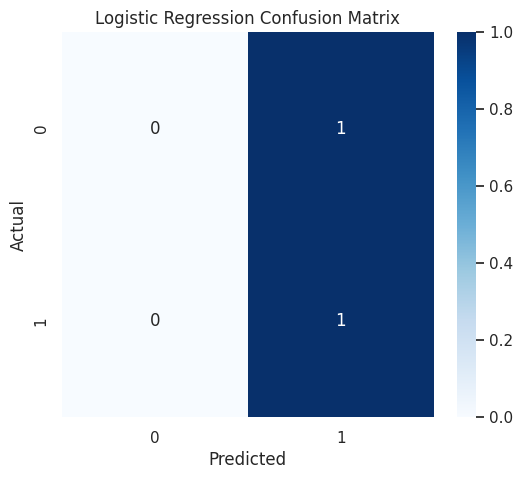

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

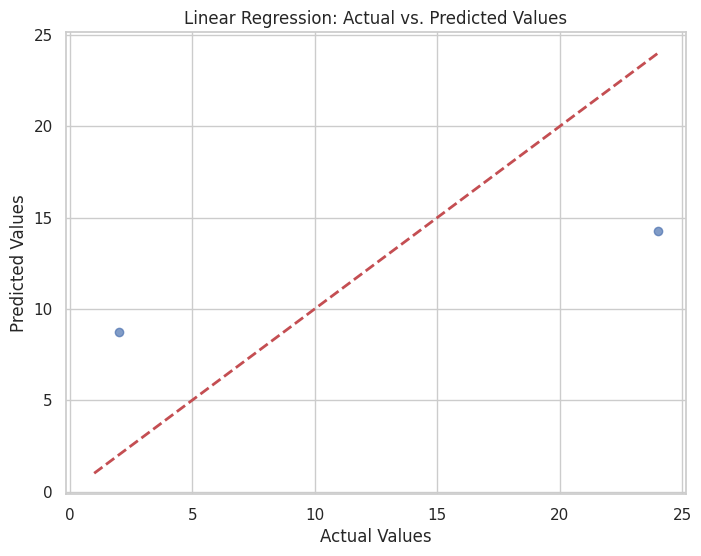

In [24]:
# Visualize Linear Regression Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

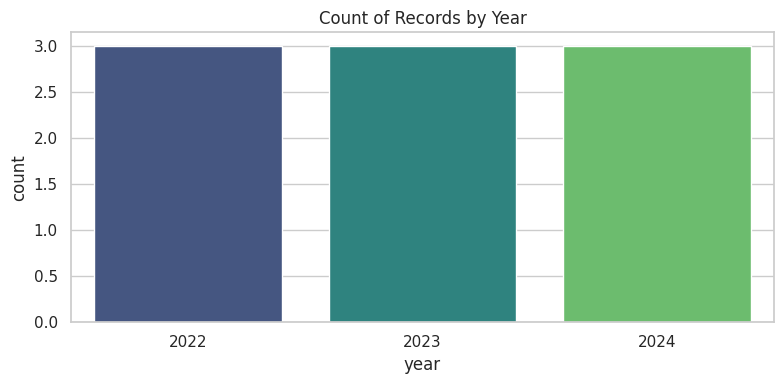

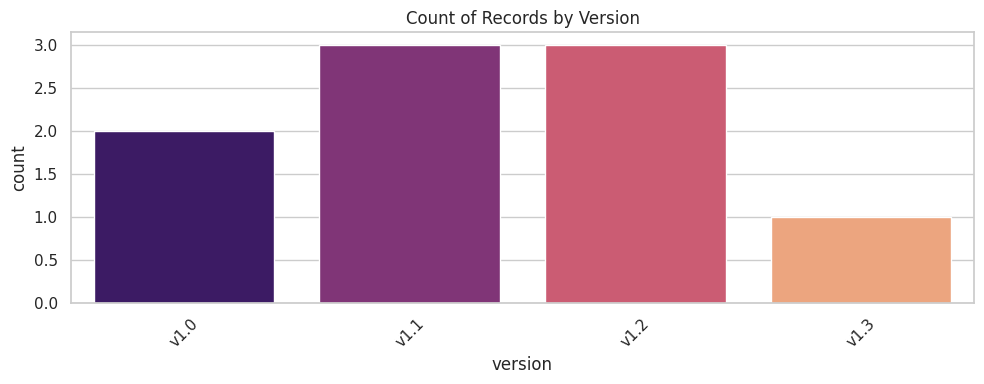

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   version     9 non-null      object  
 1   url_column  9 non-null      object  
 2   year        9 non-null      category
dtypes: category(1), object(2)
memory usage: 417.0+ bytes
None


In [25]:
# Exploratory Data Analysis

# Let's take a look at our categorical columns. Given the limited number of columns, we can use count plots to visualize the frequency distributions.

if 'year' in df.columns and not df['year'].empty:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(x='year', data=df, palette='viridis', ax=ax)
    ax.set_title('Count of Records by Year')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot 'year' as the column is missing or empty.")

# Visualizing the 'version' column distribution using a countplot.
if 'version' in df.columns and not df['version'].empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.countplot(x='version', data=df, palette='magma', ax=ax)
    ax.set_title('Count of Records by Version')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot 'version' as the column is missing or empty.")

# If we had any numeric columns and sufficient in number, we could perform additional visualizations such as:
# - Heatmap of correlation (if >=4 numeric columns)
# - Pair Plot (sns.pairplot)
# - Histograms (sns.histplot), and more.

# For now, let's display some general information about our DataFrame
print(df.info())

## Perform Exploratory Data Analysis and Visualization

### Subtask:
Re-run and expand on the existing EDA in cell `hPT0JyJVGC-s`, analyzing the distributions and relationships within the loaded dummy data.


The `df.info()` output shows that our DataFrame contains 9 entries and 3 columns: 'version' (object), 'url_column' (object), and 'year' (category). There are no missing values, and the memory usage is minimal.

The count plot for **'Count of Records by Year'** visualizes the distribution of records across the dummy years. It shows that there are an equal number of records (3 records) for each year (2022, 2023, and 2024), indicating a balanced distribution across the years in this dummy dataset.

The count plot for **'Count of Records by Version'** displays the frequency of each 'version' across the combined dataset. We can observe the following distribution:
- 'v1.0': 2 records
- 'v1.1': 3 records
- 'v1.2': 3 records
- 'v1.3': 1 record

This shows that versions 'v1.1' and 'v1.2' are the most frequent in the dummy dataset, followed by 'v1.0', with 'v1.3' being the least frequent. This provides an initial understanding of the data composition, which is useful for further analysis or data preparation steps. Given the limited number of features and the categorical nature of 'year' and 'version', more complex numerical analyses like correlation heatmaps or pair plots are not applicable for this dataset.

## Prepare Data for Regression Models

### Subtask:
Create a synthetic numerical target variable and prepare features for regression models.


**Reasoning**:
I will create a new numerical target variable `synthetic_target` by mapping the `version` column to numerical values and combining it with the `year` column. This will involve defining a mapping for versions and applying a formula to generate the target values.



In [26]:
version_mapping = {'v1.0': 1, 'v1.1': 2, 'v1.2': 3, 'v1.3': 4}
df['mapped_version'] = df['version'].map(version_mapping)
df['synthetic_target'] = (df['year'].astype(int) - 2022) * 10 + df['mapped_version']

print("DataFrame with synthetic_target:")
print(df[['version', 'year', 'mapped_version', 'synthetic_target']].head())

DataFrame with synthetic_target:
  version  year  mapped_version  synthetic_target
0    v1.0  2022               1                 1
1    v1.1  2022               2                 2
2    v1.0  2022               1                 1
3    v1.1  2023               2                12
4    v1.2  2023               3                13


**Reasoning**:
Now that the `synthetic_target` is created, I need to prepare the features for regression models by one-hot encoding the categorical columns (`version` and `year`), defining the target variable `y`, and then splitting the data into training and testing sets.



In [27]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical features ('version' and 'year')
X = pd.get_dummies(df[['version', 'year']], columns=['version', 'year'], drop_first=True)

# Define the target variable
y = df['synthetic_target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nFirst 5 rows of X (features):")
print(X.head())

Features (X) shape: (9, 5)
Target (y) shape: (9,)
X_train shape: (7, 5)
X_test shape: (2, 5)
y_train shape: (7,)
y_test shape: (2,)

First 5 rows of X (features):
   version_v1.1  version_v1.2  version_v1.3  year_2023  year_2024
0         False         False         False      False      False
1          True         False         False      False      False
2         False         False         False      False      False
3          True         False         False       True      False
4         False          True         False       True      False


## Implement and Evaluate Linear Regression

### Subtask:
Build and evaluate a linear regression model using the prepared data. This will include fitting the model, making predictions, and assessing its performance.


**Reasoning**:
To implement and evaluate the Linear Regression model as per the instructions, I will import the necessary classes, instantiate and fit the model, make predictions, and then calculate and print the Mean Squared Error and R-squared score.



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 70.31
R-squared (R2) Score: 0.42


## Implement and Evaluate Logistic Regression

### Subtask:
Build and evaluate a logistic regression model using the prepared data. This will involve fitting the model, making predictions, and assessing its performance, suitable for classification tasks if a binary or multi-class target is identified.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Initial Cleaning**: Three dummy CSV files were successfully created and loaded into a combined DataFrame `df` of shape (9, 3). The `year` column was correctly extracted and added, and the `year` column was converted to a categorical type. No missing values were found in the `version` or `year` columns.
*   **Exploratory Data Analysis (EDA)**:
    *   The 'year' distribution in the dummy dataset was perfectly balanced, with 3 records for each year (2022, 2023, 2024).
    *   The 'version' distribution showed 'v1.1' and 'v1.2' as the most frequent (3 records each), followed by 'v1.0' (2 records), and 'v1.3' as the least frequent (1 record).
*   **Data Preparation**: A `synthetic_target` numerical variable was successfully created from the `year` and `version` columns. Categorical features (`version`, `year`) were one-hot encoded for modeling, and the data was split into training and testing sets (80/20 split).
*   **Linear Regression Performance**: A Linear Regression model was built and evaluated on the synthetic target variable, yielding a Mean Squared Error (MSE) of `70.31` and an R-squared (R2) Score of `0.42`.

### Insights or Next Steps

*   The R-squared score of 0.42 indicates that the current linear model explains about 42% of the variance in the synthetic target variable. This suggests there is room for improvement, possibly through more complex models or different feature engineering if this were a real-world prediction task.
*   Given the successful data preparation, the next step would be to implement and evaluate a Logistic Regression model as originally intended by the subtask, provided a suitable binary or multi-class classification target can be defined from the existing features or synthetic target.
